In [1]:
import os
os.chdir('/nas/ucb/oliveradk/diverse-gen/')

In [2]:
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt


from diverse_gen.datasets.toy_grid import generate_data

In [11]:
# Plot the data with custom color map
from matplotlib.colors import ListedColormap

# Create custom colormap (blue for 1, red for 0, grey for -1)
colors = ['#AAAAAA', '#FF6666', '#6666FF']  # grey, red, blue for -1, 0, 1
cmap = ListedColormap(colors)

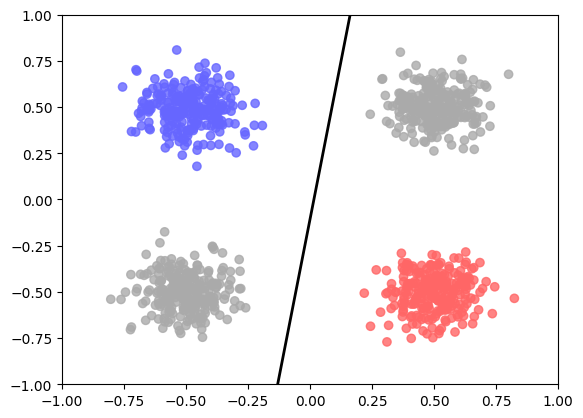

In [85]:
# apply self-training classifier
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# generate data
seed = np.random.randint(0, 1000000)
x, y, g = generate_data(1000, train=False, gaussian=True, seed=seed)
y[g[:, 0] != g[:, 1]] = -1

# create self-training classifier
base_clf = LogisticRegression(max_iter=1000)
self_training_clf = SelfTrainingClassifier(
    base_estimator=base_clf,
    threshold=0.75  # confidence threshold for adding unlabeled samples
)

# fit the model
self_training_clf.fit(x, y)

# plot the decision boundary
weights = self_training_clf.base_estimator_.coef_[0]  # Shape (n_features,)
intercept = self_training_clf.base_estimator_.intercept_[0]

x1_min, x1_max = -1, 1
x1_values = np.array([x1_min, x1_max])

x2_values = -(weights[0]/weights[1])*x1_values - (intercept/weights[1])

plt.plot(x1_values, x2_values, 'k-', linewidth=2, label='Decision Boundary')

# Plot labeled and unlabeled points
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()


[-4.06578621  4.22820656]
0.022134223319626393


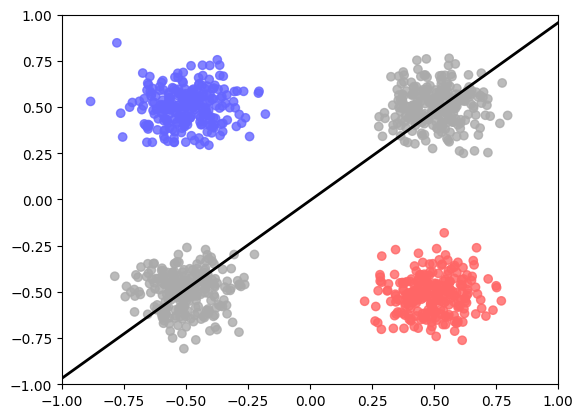

In [86]:
# apply self-training classifier
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# generate data
seed = np.random.randint(0, 1000000)
x, y, g = generate_data(1000, train=False, gaussian=True, seed=seed)
x_train = x[g[:, 0] == g[:, 1]]
y_train = y[g[:, 0] == g[:, 1]]
y[g[:, 0] != g[:, 1]] = -1

# create self-training classifier
clf = LogisticRegression(max_iter=1000)

# fit the model
clf.fit(x_train, y_train)

# plot the decision boundary
weights = clf.coef_[0]  # Shape (n_features,)
intercept = clf.intercept_[0]
print(weights)
print(intercept)

x1_min, x1_max = -1, 1
x1_values = np.array([x1_min, x1_max])

x2_values = -(weights[0]/weights[1])*x1_values - (intercept/weights[1])

plt.plot(x1_values, x2_values, 'k-', linewidth=2, label='Decision Boundary')

# Plot labeled and unlabeled points
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()


In [ ]:
# TODO: implement ACE using self-training format 